In [ ]:
import scipy
import kohonen
import tensorflow
import sompy
import json
import numpy as np 
import matplotlib.pylab as plt
# import sompy as sompy
import pandas as pd
from time import time

In [5]:
with open('E:/Work/Intern/Neva/Tasks and assignments/som model/dataOut.txt') as fi:
    data = json.load(fi)

In [6]:
gyroRotationX = data['sensor']['gyroData']['gyroRotationX']
gyroRotationY = data['sensor']['gyroData']['gyroRotationY']
gyroRotationZ = data['sensor']['gyroData']['gyroRotationZ']
orientationAzimuth = data['sensor']['orientationData']['orientationAzimuth']

print('data loaded')

data loaded


In [7]:
d = {}
d['gyroRotationX'] = gyroRotationX
d['gyroRotationY'] = gyroRotationY
d['gyroRotationZ'] = gyroRotationZ
d['orientationAzimuth'] = orientationAzimuth
df = pd.DataFrame(d)

      gyroRotationX  gyroRotationY  gyroRotationZ  orientationAzimuth
1108       0.452087       0.275752       0.203681            2.768091
1109       0.321319       0.369354      -0.038518            2.771094
1110       0.127890       0.341335      -0.140153            2.731523
1111      -0.461093       0.672748       0.040981            2.740437
1112       0.281288      -0.367660       0.141688            2.761507


In [8]:
data = np.array(df)

In [9]:
mapsize = [20,30]
som = sompy.SOMFactory.build(data, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='bubble', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=-1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything

 Training...
 pca_linear_initialization took: 1.660000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 17

 epoch: 1 ---> elapsed time:  0.132000, quantization error: 1.053102

 epoch: 2 ---> elapsed time:  0.120000, quantization error: 0.798053

 epoch: 3 ---> elapsed time:  0.124000, quantization error: 0.730341

 epoch: 4 ---> elapsed time:  0.125000, quantization error: 0.698593

 epoch: 5 ---> elapsed time:  0.126000, quantization error: 0.647613

 epoch: 6 ---> elapsed time:  0.124000, quantization error: 0.643112

 epoch: 7 ---> elapsed time:  0.125000, quantization error: 0.600497

 epoch: 8 ---> elapsed time:  0.124000, quantization error: 0.580710

 epoch: 9 ---> elapsed time:  0.128000, quantization error: 0.549395

 epoch: 10 ---> elapsed time:  0.122000, quantization error: 0.541159

 epoch: 11 ---> elapsed time:  0.123000, quantization error: 0.537227

 epoch: 12 ---> elapsed time:  0.130000, quantization error: 0.493424

 epoch: 13 --

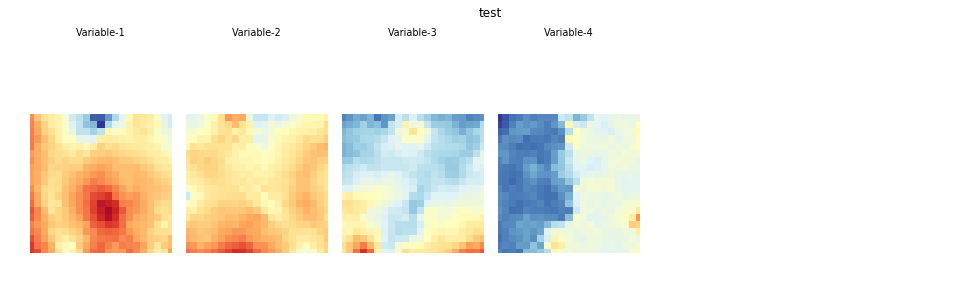

In [10]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim='all', cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

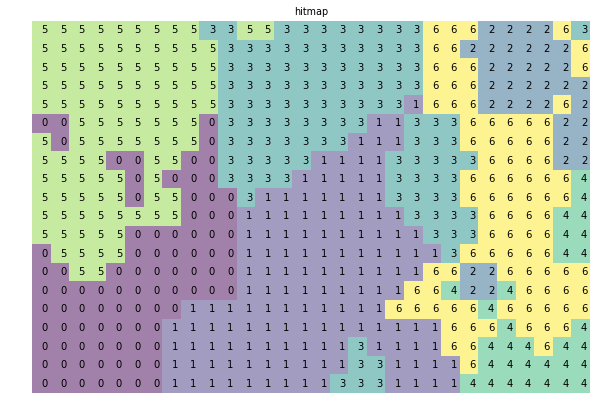

array([[  0,   0,   0],
       [  0,   1,   1],
       [  0,   2,   2],
       ..., 
       [ 19,  27, 597],
       [ 19,  28, 598],
       [ 19,  29, 599]])

In [21]:
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=7)
# getattr(som, 'cluster_labels')
# v.show(som, what='cluster')
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

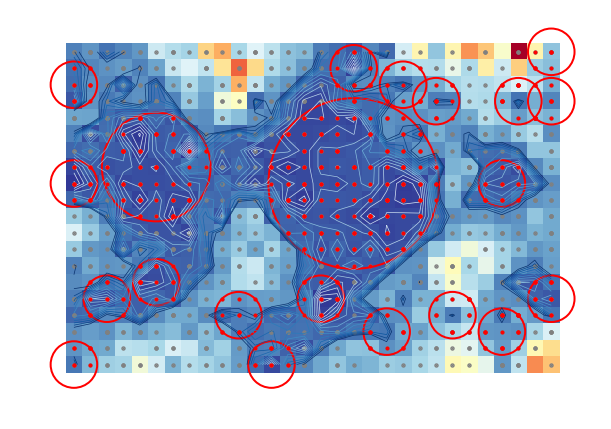

In [16]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=True)